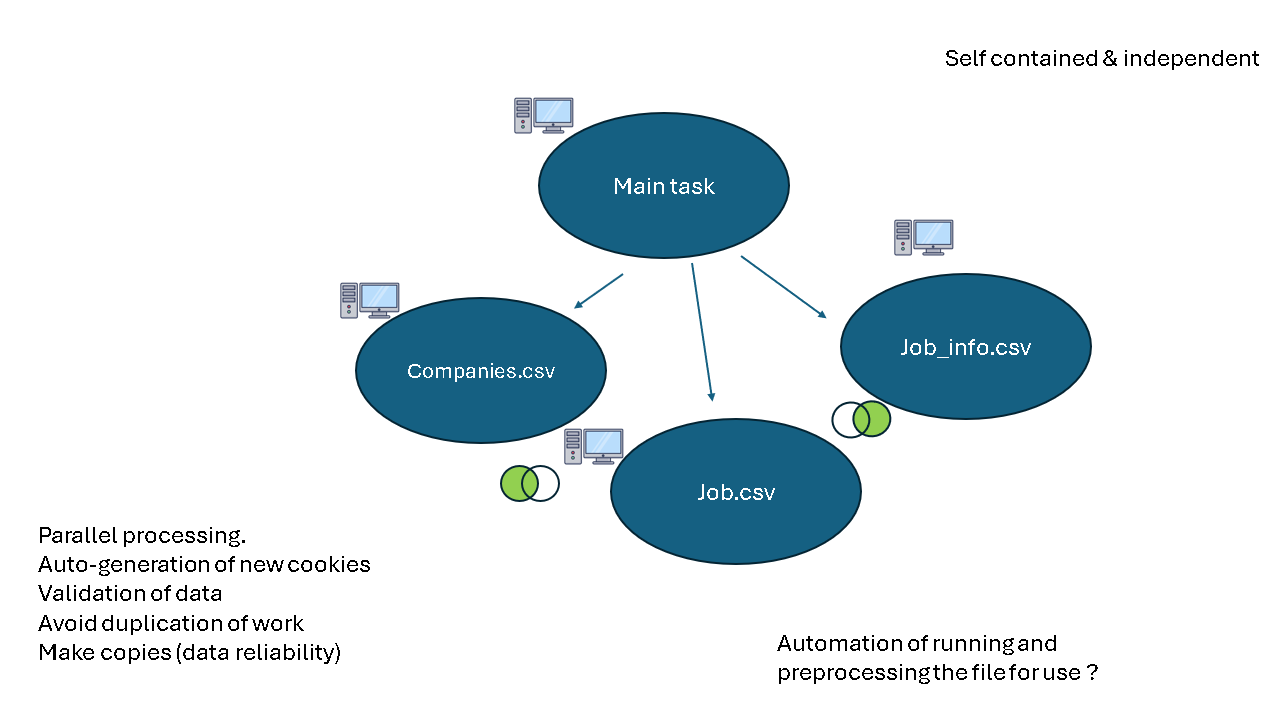

In [29]:
import pandas as pd
from bs4 import BeautifulSoup

In [30]:
companies = pd.read_csv(r'C:\Users\srika\OneDrive\Documents\York\Sem-2 york\MBAN 6090 - Analytics Consulting Project\webscrap\communitech\companies.csv')

In [31]:
companies.head(5)

,Name,Description,Locations,Logo URL,Topics,Industry Tags,Stage,Head Count,Active Jobs Count
0,Cohere,Cohere is a platform to build machines that un...,"Toronto, ON, Canada",https://cdn.filestackcontent.com/fo5R6NHXSKeNL...,"100-499, AI/ML, B2B, Developer tool, SaaS, Sof...","Information Technology, Software",other,4.0,31
1,Shinydocs,Shinydocs Corporation develops enterprise-clas...,"Waterloo, ON, Canada",https://cdn.filepicker.io/api/file/xuigQdXzT9i...,"B2B, Productivity, SaaS, Software","Information Technology, Software",other,3.0,1
2,Mappedin,"Headquartered in Waterloo, Ontario, Mappedin i...","Waterloo, ON, Canada",https://cdn.filestackcontent.com/JGvrtjn9R9qX4...,"B2B, Productivity, Proptech, SaaS, Software","Information Technology, Software",series_a,3.0,4
3,Fable,Fable is a leading accessibility testing platf...,"Toronto, ON, Canada",https://cdn.filestackcontent.com/NFpYjN03SNCUM...,"Data & analytics, Female founded, Oneeleven, P...","Information Technology, Software",series_a,3.0,2
4,Dozr,Dozr is a contractor to contractor equipment r...,"Kitchener, ON, Canada",https://cdn.filestackcontent.com/ujIS7UQ2Scuo6...,"50-99, B2B, C100 alumni, Female founded, Propt...","Information Technology, Media, Real Estate",series_b,3.0,4


In [32]:
companies['Description'][4]

"Dozr is a contractor to contractor equipment rental marketplace that is disrupting the construction industry by changing the way contractors manage their equipment. Using Dozr's online marketplace contractors can earn income with their high quality but underutilized equipment by listing their idle equipment for rent, sale, or rent with operator to other contractors within their trusted network. Contractors get significant savings by renting the equipment they need through Dozr."

In [33]:
jobs = pd.read_csv(r'C:\Users\srika\OneDrive\Documents\York\Sem-2 york\MBAN 6090 - Analytics Consulting Project\webscrap\communitech\jobs.csv')
jobs.columns = ['created_at', 'locations', 'organization_id', 'organization_name',
       'organization_logo_url', 'organization_slug', 'organization_topics',
       'organization_industry_tags', 'organization_stage',
       'organization_head_count', 'source', 'slug', 'title', 'url', 'featured',
       'has_description']
jobs.sample(5)

,created_at,locations,organization_id,organization_name,organization_logo_url,organization_slug,organization_topics,organization_industry_tags,organization_stage,organization_head_count,source,slug,title,url,featured,has_description
4220,1685728645,[],22182,Neo Financial,https://cdn.filestackcontent.com/E4HhmE0iQOZHO...,neo-financial,"['B2C', 'Consumer & lifestyle', 'Finance', 'Ma...",['Finance'],series_c_plus,4.0,career_page,26421335-senior-data-analytics-developer,Senior Data Analytics Developer,https://apply.workable.com/neo-financial/j/108...,False,True
5505,1647091148,"['Ontario, CA, USA', 'Remote']",22455,Lone Wolf Technologies,https://cdn.filepicker.io/api/file/jN2jcUcyRze...,lone-wolf-technologies,"['100-499', 'B2B', 'Proptech', 'Software']","['Finance', 'Information Technology', 'Real Es...",other,4.0,career_page,11590099-copywriter,Copywriter,https://recruit.hirebridge.com/v3/Jobs/JobDeta...,False,False
3799,1689151767,"['United States', 'Canada']",14372,Ambyint,https://cdn.filepicker.io/api/file/vnkNXJfMQYm...,ambyint,"['B2B', 'Data & analytics', 'Mining', 'Software']","['DeepTech', 'Energy', 'Manufacturing', 'Softw...",series_b,2.0,manual,27654773-marketing-manager,Marketing Manager,https://ambyint.com/careers/?job=1,False,False
5851,1603211813,"['Hyderabad, Telangana, India']",11635,Resolver,https://cdn.filepicker.io/api/file/sq3HVLV7TRS...,resolver,"['Advertising/marketing', 'B2B', 'Data & analy...","['Information Technology', 'Software']",other,4.0,career_page,2476880-automation-test-engineer,Automation Test Engineer,https://jobs.jobvite.com/resolver/job/oIsNdfwU,False,False
4133,1686568628,"['India', 'Remote']",10300,Replicon,https://cdn.filestackcontent.com/output=f:webp...,replicon,"['500+', 'AI/ML', 'B2B', 'Productivity', 'SaaS...","['Information Technology', 'Software']",series_a,4.0,career_page,26709985-enterprise-customer-success-manager-f...,Enterprise Customer Success Manager (for US ma...,https://www.replicon.com/job-description?gnk=a...,False,True


In [34]:
jd = jobs.loc[2559]
url = f'https://www1.communitech.ca/companies/{jd["organization_slug"]}/jobs/{jd["slug"]}#content'
url

'https://www1.communitech.ca/companies/keycafe/jobs/29494558-reputation-and-media-coordinator#content'

In [35]:
jobs_desc = pd.read_csv(r'C:\Users\srika\OneDrive\Documents\York\Sem-2 york\MBAN 6090 - Analytics Consulting Project\webscrap\communitech\jobs_info.csv')
jobs_desc = jobs_desc[['organization_name', 'title', 'locations','url', 'description']]
jobs_desc.head(5)

,organization_name,title,locations,url,description
0,Vidyard,"Director of Sales, Enterprise Acquisition","['United States', 'Canada', 'Remote']",https://www1.communitech.ca/companies/vidyard/...,"<div data-testid=""careerPage""><p>At Vidyard, w..."
1,Hootsuite,Senior Software Developer | Développeur logici...,"['Toronto, ON, Canada', 'Vancouver, BC, Canada']",https://www1.communitech.ca/companies/hootsuit...,"<div data-testid=""careerPage""><p><span><em><st..."
2,Semios,Chemistry Co-op,"['Vancouver, BC, Canada']",https://www1.communitech.ca/companies/semios/j...,"<div data-testid=""careerPage""><p><strong>Who w..."
3,Axonify,Senior Talent Acquisition Partner (15 months c...,"['Toronto, ON, Canada', 'Waterloo, ON, Canada']",https://www1.communitech.ca/companies/axonify/...,"<div data-testid=""careerPage""><section><div>Ax..."
4,Deep Genomics,(Senior) Research Scientist - Statistical Gene...,"['Toronto, ON, Canada']",https://www1.communitech.ca/companies/deep-gen...,"<div data-testid=""careerPage""><section><div><b..."


In [41]:
jobs_desc['description'][92]

'<div data-testid="careerPage"><section><div><span>RouteThis is a Waterloo-based B2B SaaS whose time has come to level up! We’re on a mission to intelligently automate customer support services with market leading software solutions that keep the modern, WIFI connected homes of the future optimized. RouteThis products are changing the world of technical support and we are looking for amazing talent to join our team and help us revolutionize this $15 billion dollar industry. </span></div> <div><span>RouteThis is looking for a highly motivated individual to fill a key role in acquiring new customers while providing an exceptional end-to-end experience. In this role you will be on the front lines of growing market share drawing on your previous enterprise sales experience. You will be provided with the autonomy and opportunity to manage large accounts internationally, working to understand customer challenges and driving deals through to close. You will work closely with a team of profess

<div data-testid="careerPage"><section><div><span>RouteThis is a Waterloo-based B2B SaaS whose time has come to level up! We’re on a mission to intelligently automate customer support services with market leading software solutions that keep the modern, WIFI connected homes of the future optimized. RouteThis products are changing the world of technical support and we are looking for amazing talent to join our team and help us revolutionize this $15 billion dollar industry. </span></div> <div><span>RouteThis is looking for a highly motivated individual to fill a key role in acquiring new customers while providing an exceptional end-to-end experience. In this role you will be on the front lines of growing market share drawing on your previous enterprise sales experience. You will be provided with the autonomy and opportunity to manage large accounts internationally, working to understand customer challenges and driving deals through to close. You will work closely with a team of professionals to continuously improve the sales process, increase market penetration and crush your quota.</span></div></section><section><h3>In this role you will: </h3> <ul> <li>Articulate the RouteThis vision and value proposition to prospective clients</li> <li>Help develop the outreach strategy for your target accounts and execute against it</li> <li>Exceed activity, pipeline, and revenue goals on a quarterly basis </li> <li>Effectively navigate external organizations, getting key stakeholders bought in at all levels (users through to executives)</li> <li>Manage multiple enterprise solution sale with a 3 to 12 month purchasing cycle</li> <li>Track all opportunity and customer details including use case, purchase time frames, next steps, and forecasting in Hubspot </li> <li>Work with the marketing and product teams to help provide feedback based on customer interactions in emails and calls</li> <li>Maintain balance in your pipeline (early/mid/late)</li> <li>Work with multiple team members assigned to your territory to prioritize opportunities and apply appropriate resources </li> <li>Manage the client and internal teams through the customer journey</li> <li>Partner with customer success to ensure high satisfaction within your accounts </li> </ul></section><section><h3>What you bring to the role:</h3> <ul> <li>8+ years relevant work experience in B2B software, SaaS experienced preferred </li> <li>Experience selling to VP and C level executives </li> <li>Superior written and verbal communication skills</li> <li>Consistently deliver on 6+ figure deals </li> <li>Thrive in a fast paced, self starting environment</li> <li>Have the ability to efficiently prioritize time</li> <li>Validated quota achiever (top 10% in your company) </li> <li>Team-selling experience a plus</li> <li>Telecommunications experience a plus </li> <li>Ability to travel </li> <li>University or College degree/diploma with excellence in your field of study, ideally: Sales, Marketing, Business or Communications</li> </ul></section><section><div>Do you feel like you’re able to tackle this role? Show us what you got! We absolutely don’t expect applicants to check off every box for any of our positions, and welcome you to apply if you feel like you are an excellent fit. </div> <div><b>Who we are:</b></div> <div>RouteThis is a fast-growing tech company that is changing the way ISPs and Smart Home companies handle technical support around the world. Instead of dealing with frustrating, long support calls where agents are unable to accurately identify issues, the RouteThis platform gives technical support teams the answers they need to immediately identify and resolve customers’ issues -- or help customer to solve it themselves before even needing to call.</div> <div>We are headquartered in the Waterloo Region and our customers are all over the globe. If you want to work on the next generation of network diagnostics that provides a disruptive new approach for tech support teams, you should be working at RouteThis!</div> <div><b>Why RouteThis?</b></div> <div>• Growth: As a rapidly growing startup, we’re constantly facing new challenges and prefer to promote from within. By working with us, you can jumpstart and shape your career.</div> <div>• Team: At RouteThis you’ll be working on a highly-motivated team. We have carefully selected who we hire as we are a close team.</div> <div>• Fun: We host social events both virtual and in person. We believe that work should be fun and engaging.</div> <div>• Perks &amp; Benefits: We offer competitive salaries, stock options and a comprehensive benefits package.</div> <div>• Location: Located in the Waterloo-region in downtown Kitchener, we offer flexible work arrangements including hybrid and virtual options.</div> <div> <b>Please note:</b> We thank all applicants for your interest in RouteThis. Only those applicants selected for an interview will be contacted. Agency calls will not be accepted. RouteThis is an Equal Opportunity Employer and considers applicants for employment without regard to race, colour, religion, sex, orientation, national origin, age, disability, genetics or any other basis forbidden un•der federal, provincial, or local law. Please let us know if you require an accommodation due to a disability and we will work with you to address your needs.</div></section></div>'

In [36]:
jobs_desc['url'][92]

'https://www1.communitech.ca/companies/routethis/jobs/30920999-senior-enterprise-account-executive#content'

In [37]:
html_string = jobs_desc['description'][92]
soup = BeautifulSoup(html_string, 'html.parser')
text_content = soup.get_text()
print(text_content)
# <div> is to be removed from the text

RouteThis is a Waterloo-based B2B SaaS whose time has come to level up! We’re on a mission to intelligently automate customer support services with market leading software solutions that keep the modern, WIFI connected homes of the future optimized. RouteThis products are changing the world of technical support and we are looking for amazing talent to join our team and help us revolutionize this $15 billion dollar industry.  RouteThis is looking for a highly motivated individual to fill a key role in acquiring new customers while providing an exceptional end-to-end experience. In this role you will be on the front lines of growing market share drawing on your previous enterprise sales experience. You will be provided with the autonomy and opportunity to manage large accounts internationally, working to understand customer challenges and driving deals through to close. You will work closely with a team of professionals to continuously improve the sales process, increase market penetrati

RouteThis is a Waterloo-based B2B SaaS whose time has come to level up! We’re on a mission to intelligently automate customer support services with market leading software solutions that keep the modern, WIFI connected homes of the future optimized. RouteThis products are changing the world of technical support and we are looking for amazing talent to join our team and help us revolutionize this $15 billion dollar industry.  RouteThis is looking for a highly motivated individual to fill a key role in acquiring new customers while providing an exceptional end-to-end experience. In this role you will be on the front lines of growing market share drawing on your previous enterprise sales experience. You will be provided with the autonomy and opportunity to manage large accounts internationally, working to understand customer challenges and driving deals through to close. You will work closely with a team of professionals to continuously improve the sales process, increase market penetration and crush your quota.In this role you will:   Articulate the RouteThis vision and value proposition to prospective clients Help develop the outreach strategy for your target accounts and execute against it Exceed activity, pipeline, and revenue goals on a quarterly basis  Effectively navigate external organizations, getting key stakeholders bought in at all levels (users through to executives) Manage multiple enterprise solution sale with a 3 to 12 month purchasing cycle Track all opportunity and customer details including use case, purchase time frames, next steps, and forecasting in Hubspot  Work with the marketing and product teams to help provide feedback based on customer interactions in emails and calls Maintain balance in your pipeline (early/mid/late) Work with multiple team members assigned to your territory to prioritize opportunities and apply appropriate resources  Manage the client and internal teams through the customer journey Partner with customer success to ensure high satisfaction within your accounts  What you bring to the role:  8+ years relevant work experience in B2B software, SaaS experienced preferred  Experience selling to VP and C level executives  Superior written and verbal communication skills Consistently deliver on 6+ figure deals  Thrive in a fast paced, self starting environment Have the ability to efficiently prioritize time Validated quota achiever (top 10% in your company)  Team-selling experience a plus Telecommunications experience a plus  Ability to travel  University or College degree/diploma with excellence in your field of study, ideally: Sales, Marketing, Business or Communications Do you feel like you’re able to tackle this role? Show us what you got! We absolutely don’t expect applicants to check off every box for any of our positions, and welcome you to apply if you feel like you are an excellent fit.  Who we are: RouteThis is a fast-growing tech company that is changing the way ISPs and Smart Home companies handle technical support around the world. Instead of dealing with frustrating, long support calls where agents are unable to accurately identify issues, the RouteThis platform gives technical support teams the answers they need to immediately identify and resolve customers’ issues -- or help customer to solve it themselves before even needing to call. We are headquartered in the Waterloo Region and our customers are all over the globe. If you want to work on the next generation of network diagnostics that provides a disruptive new approach for tech support teams, you should be working at RouteThis! Why RouteThis? • Growth: As a rapidly growing startup, we’re constantly facing new challenges and prefer to promote from within. By working with us, you can jumpstart and shape your career. • Team: At RouteThis you’ll be working on a highly-motivated team. We have carefully selected who we hire as we are a close team. • Fun: We host social events both virtual and in person. We believe that work should be fun and engaging. • Perks & Benefits: We offer competitive salaries, stock options and a comprehensive benefits package. • Location: Located in the Waterloo-region in downtown Kitchener, we offer flexible work arrangements including hybrid and virtual options.  Please note: We thank all applicants for your interest in RouteThis. Only those applicants selected for an interview will be contacted. Agency calls will not be accepted. RouteThis is an Equal Opportunity Employer and considers applicants for employment without regard to race, colour, religion, sex, orientation, national origin, age, disability, genetics or any other basis forbidden un•der federal, provincial, or local law. Please let us know if you require an accommodation due to a disability and we will work with you to address your needs.

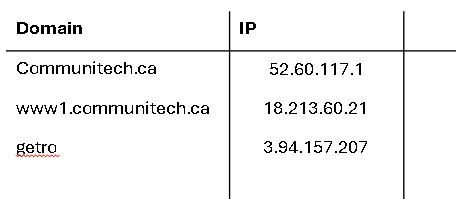

In [38]:
from googlesearch import search
for i in search("communitech.ca jobs companies students community", num_results=10):
    print(i)

https://communitech.ca/about-us/jobs-communitech.html
https://www1.communitech.ca/jobs
https://www1.communitech.ca/companies
https://www1.communitech.ca/companies/giatec-2/jobs/26274275-student-talent-community-giatec
https://communitech.ca/
https://www1.communitech.ca/companies/brainstation/jobs/30749067-student-experience-coordinator
https://www1.communitech.ca/companies/bananatag-2/jobs/30894091-working-student-content-marketing
https://www1.communitech.ca/companies/communitech
https://www1.communitech.ca/companies/canada-learning-code
https://www1.communitech.ca/jobs?filter=eyJqb2JfZnVuY3Rpb25zIjpbIk1hcmtldGluZyAmIENvbW11bmljYXRpb25zIl19
https://www1.communitech.ca/companies/smart-ecosystems?filter=eyJzZWFyY2hhYmxlX2xvY2F0aW9ucyI6WyJDYWxnYXJ5LCBBQiwgQ2FuYWRhIl19
https://www1.communitech.ca/companies/paper?q=paper


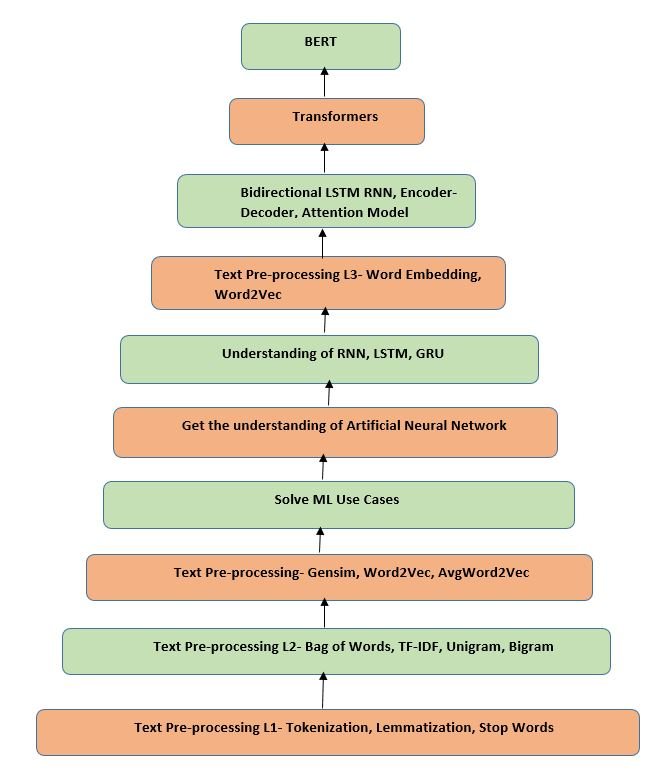